In [1]:
%matplotlib inline # run this cell in order to have your plots in the notebook; otherwise use plt.show() to see each plot

UsageError: unrecognized arguments: # run this cell in order to have your plots in the notebook; otherwise use plt.show() to see each plot


## Exploratory spatial data analyis with *pandas*

#### Exploratory data analysis
 is the first stage in a data science study, after data collection. The goal of this stage is to get insight into a dataset, explore the underlining stucture and patterns in the data as well as to identify outliers, missing vales, normalize or transform data. 
Main tools involved in this processare summary statics and graphics.

In this exercise you will:
- performe basic statistics on pandas dataframe
- experiment different plotting options
- deal with coordinates systems and projections in python by using functionality from cartopy library
- practice with time data 
- perform agregation operations on pandas GroupBy objects
- practice for loops, list comprehensions, boolean masking, and dataframe manipulation



For this exercise we will use a subset of one of the datasets realised by [LifeWatch INBO project](https://inbo.carto.com/u/lifewatch/datasets).


#### Task 01: Import the necesary python libraries
To solve this exercise, please, import following python libraries: pandas, numpy, matplotlib.pyplot
 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#### Task 02: Reading the data and getting a first ideea about the dataset
- Read the file GPS_tracking.csv in a pandas DataFrame (DF). *Hint: pandas.read_csv()* . (don't forget that you imported pandas using a shorer name - alias)

Make sure the .csv file is located in your working directory or provide the full path to the data.
- Get basic information about the data using pandas *.info(),.head()* and *.tail()* methods.

In [4]:
birddata = pd.read_csv('/Users/takayuki/Document/TUB/Geospatil_Analysis/lab 2 - EDA with pandas/GPS_tracking.csv')

In [5]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


In [6]:
# one line of code

In [7]:
# one line of code

In [8]:
birddata.bird_name[:10]

0    Eric
1    Eric
2    Eric
3    Eric
4    Eric
5    Eric
6    Eric
7    Eric
8    Eric
9    Eric
Name: bird_name, dtype: object

In [9]:
# another way
birddata["bird_name"][:5]

0    Eric
1    Eric
2    Eric
3    Eric
4    Eric
Name: bird_name, dtype: object

#### Task 03: Extracting the unique values in a column


Extract the names of the birds whose trajectories are recorded in the dataset. Hint: pandas.unique ? on the column containing the birds ' names

In [10]:
bird_names = birddata['bird_name'].unique()
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

#### Task 03: Basic plotting with *matplotlib*

We will start by plotting the latitude and longitude of a flight trajectory for a single bird (of your choice) in a standard two dimensional plot. In order to accomplish this task you will:

 - extract the indices in the DF corresponding to the chosen bird_name in a variable idx
 - extract the X and Y-coordinates (as a tuple) of the flight trajectories ( Xs correspond to the values stored in  longitude column, ys corresponds to the values stored in  latitude column) from longitude and latitude columns using the boolean array previously stored *idx* variable 
 
 - plot the trajectory of the chosen bird as a line unsing the plt.plot. The default colour is blue; please experiment with changing the color. Use '.' as marker type. Change also the value of the linewidth parameter.
 


In [11]:
idx = birddata['bird_name'] == 'Eric'
idx

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
61890    False
61891    False
61892    False
61893    False
61894    False
61895    False
61896    False
61897    False
61898    False
61899    False
61900    False
61901    False
61902    False
61903    False
61904    False
61905    False
61906    False
61907    False
61908    False
61909    False
61910    False
61911    False
61912    False
61913    False
61914    False
61915    False
61916    False
61917    False
61918    False
61919    False
Name: bird_name, Length: 61920, dtype: bool

In [12]:
X, Y = birddata.longitude[idx],birddata.latitude[idx]
X

0        2.120733
1        2.120746
2        2.120885
3        2.120859
4        2.120887
5        2.120840
6        2.120901
7        2.120809
8        2.120860
9        2.121301
10       2.120850
11       2.121236
12       2.121362
13       2.152945
14       2.152989
15       2.153052
16       2.153097
17       2.152993
18       2.153009
19       2.162817
20       2.193876
21       2.194880
22       2.194862
23       2.194836
24       2.194866
25       2.234223
26       2.247980
27       2.224581
28       2.252524
29       2.252949
           ...   
19765    3.388995
19766    3.413596
19767    3.354105
19768    3.355686
19769    3.309810
19770    3.345546
19771    3.358302
19772    3.359888
19773    3.359905
19774    3.339680
19775    3.276436
19776    3.367717
19777    3.395449
19778    3.425730
19779    3.427635
19780    3.431588
19781    3.431753
19782    3.427535
19783    3.406217
19784    3.301086
19785    3.216247
19786    3.216455
19787    3.216570
19788    3.216395
19789    3

The code in the following cell creates a figure object of size (7,7)  which will serve as a container for your plot.

In [13]:
plt.figure(figsize =(7,7));

<Figure size 504x504 with 0 Axes>

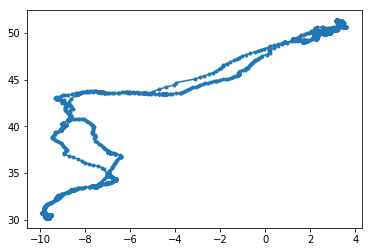

In [14]:
# _ is a dummy variable which we don't have interest
_ = plt.plot(X,Y, marker = '.')

What do you think about plotting the trajectory using this method? What did we neglected by plotting the recorded positions as points in a cartesian system of coordinates?

##### Task 03 b: plotting the trajectories of all birds in a sigle plot

The task is similar to the previous one, but you have to loop over all three birds:
- loop over the list bird_names. Hint: use a 'for' loop and the operator 'in'
- within the loop solve for the tasks you accomplished at 3a.
> - extract the indices in the DF corresponding to a bird (represented by your looping valiable) in a variable idx 
> - extract the X and Y-coordinates (as a tuple of cartesian coordinates) of the flight trajectories 
> - to identify the trajectory corresponding to a particular bird in your plot you can label the different plots (Hint: assign to the label argument of the plot the value 'bird_name' aka the looping var
- add  x and y axis labels Hint: plt.xlabel()
- add a legend Hint: plt.legend(loc = ' ') possible values for loc = : 'best', 'lower right', 'upper left', 'right', etc-
- save your figure using plt.figure('a_name.pdf')




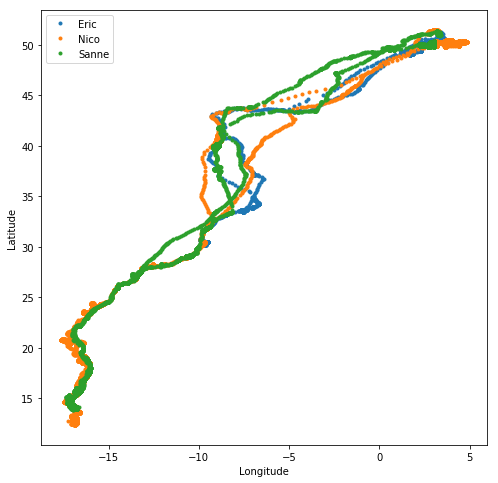

In [15]:

# create a figure object with size (8,8)
plt.figure(figsize = (8,8))
for name in bird_names:
    ix = birddata['bird_name'] == name # bool data. Iterate eric, nico, sanne. 
    x, y = birddata.longitude[ix], birddata.latitude[ix] # store data only true
    plt.plot(x,y,'.',label = name)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
plt.legend(loc = 'best')
plt.savefig('birds_trajectories.pdf')

# plot legend


# save figure
    
    

#### Task 04: Examining the speed 2D

The data also contain estimates of two dimensional speeds of the birds.
- extract the speed data for a chosen bird in a similar way as you did at task 04.
- plot a histogram for the seed data corresponding to the chosen bird unsing the method plt.hist() with the speed data and the default parameters
- check the parameters of .hist() method


(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

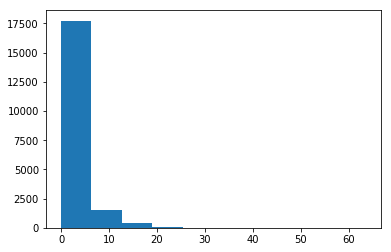

In [17]:
ix = birddata['bird_name'] == 'Eric'
speed = birddata.speed_2d[ix]
# plot the histogram of the data stored in the speed variable with the default parameters
plt.hist(speed)
# one line of code

##### Task 04 -b: Identifying the cause of error

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <a list of 10 Patch objects>)

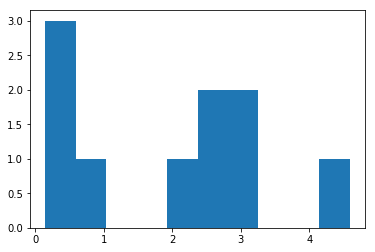

In [18]:
# plot the histogram of only the first 10 data points stored in the speed variable with the default parameters
plt.hist(speed[:10])
# one line of code

Since we get a histogram when plotting only the first 10 data points, it is reasonable to think that our data contains some invalid values. That's why, we have to check what data is contained in our array.
-  Check if the 'speed' array contains non-number objects.For this you can use NumPy function *isnan* which takes as input an array and returns a boolean value

In [19]:
# check if there is NaN(Not a Number) value
np.isnan(speed)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
19765    False
19766    False
19767    False
19768    False
19769    False
19770    False
19771     True
19772    False
19773    False
19774    False
19775    False
19776    False
19777    False
19778     True
19779    False
19780    False
19781    False
19782    False
19783    False
19784    False
19785    False
19786    False
19787    False
19788    False
19789    False
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

- For a more concise answer, take the previous line of code and use the *np.any()* method to ask if any of the output is equal to true.
- A related method is *np.all()*. Please anticipate the output of applying the two methods on the previous line before running the code.
- Find out how many NaNs we exactly have in our speed array. Hint: np.sum() used with a boolean array convers True to 1 and False to 0

In [20]:
print(np.any(np.isnan(speed)))
print(np.all(np.isnan(speed)))

True
False


In [21]:
# compute the nr of NaNs in our 'speed' array
nr_nans = np.sum(np.isnan(speed))
print(nr_nans)

85


After detecting the missing values in our data, we want to include as input to out histogram plot only those observations that are actually numeric. For this we have to apply the following steps:
- find the NaNs in the 'speed' array and assign the output to a variable ind 
- check the type of the values in'ind' (you can print the vector)
- plot the bitwise complement of the ind array using the operator ' ~ ' (turns each occurrence of true to a false and vice versa); Also,
> -  a histogram is informative when the bin width fits to the data. Change the value of the *bins* argument in order to best describe your data; Hint: you can use np.linspace(start_val, end_val, nr_values) to generate the borders of the bins; you can start with np.linspace(0,30,20) and try to find those values for the bins widths that best reflect the data distribution
> -  add meaningful axes labels. Hint: the Y axis is the 'Frequency'
> -  normalize the histogram



In [22]:
# '~' makes the value opposite
ind_n = ~np.isnan(speed) 
print(ind_n)

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
19765     True
19766     True
19767     True
19768     True
19769     True
19770     True
19771    False
19772     True
19773     True
19774     True
19775     True
19776     True
19777     True
19778    False
19779     True
19780     True
19781     True
19782     True
19783     True
19784     True
19785     True
19786     True
19787     True
19788     True
19789     True
19790     True
19791     True
19792     True
19793     True
19794     True
Name: speed_2d, Length: 19795, dtype: bool


(array([4.405e+03, 2.982e+03, 1.987e+03, 1.482e+03, 1.204e+03, 1.070e+03,
        8.590e+02, 7.020e+02, 4.930e+02, 4.580e+02, 3.400e+02, 2.560e+02,
        2.400e+02, 2.300e+02, 1.970e+02, 1.690e+02, 1.410e+02, 1.460e+02,
        1.240e+02, 1.340e+02, 1.160e+02, 1.030e+02, 1.040e+02, 1.060e+02,
        1.170e+02, 7.900e+01, 8.900e+01, 8.700e+01, 6.900e+01, 7.100e+01,
        8.900e+01, 6.500e+01, 7.100e+01, 6.600e+01, 6.100e+01, 4.900e+01,
        4.500e+01, 5.500e+01, 6.000e+01, 5.100e+01, 3.500e+01, 3.100e+01,
        2.900e+01, 2.900e+01, 2.200e+01, 2.900e+01, 2.700e+01, 2.900e+01,
        2.100e+01, 2.400e+01, 1.400e+01, 1.400e+01, 1.200e+01, 1.300e+01,
        1.400e+01, 1.100e+01, 1.600e+01, 1.500e+01, 1.100e+01, 1.500e+01,
        5.000e+00, 1.000e+01, 6.000e+00, 7.000e+00, 3.000e+00, 9.000e+00,
        3.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 7.000e+00, 7.000e+00,
        2.000e+00, 3.000e+00, 5.000e+00, 0.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 3.000e+00, 1.000e+0

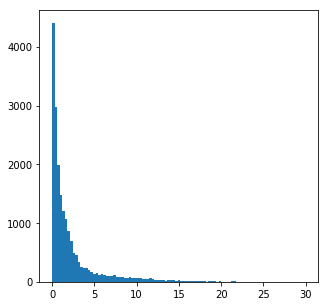

In [23]:
plt.figure(figsize = (5,5));
plt.hist(speed[ind_n], bins = np.linspace(0,30,100))


#### Task 05: Plotting with pandas

Pandas provides plotting functionality as well (wrapers to plt methods). Although less customizable than PLT plots, they solve some data issues such as dealing with NaNs.
However always examine your data carefully and look for the presence of NaNs before preparing your plots!!

**Pandas plotting functions are methods of data frame instances!.** ex: ...df.plot(kind = 'scatter', ...).
You can plot a different figure by changing the value of the 'kind' argument of pandas plot function.

- Use the introspection method to get a better understanding of ploting in pandas
- plot a histogram of the speed_2d data providing  range = [0,30] as argument. Which is the role of 'range' argument? Can you find better values for range argument?
- label x axis






Text(0.5, 0, '2D speed')

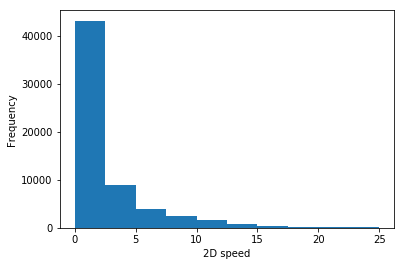

In [24]:
birddata.speed_2d.plot(kind = 'hist', range = {0, 25})
plt.xlabel('2D speed')
# output -> many 0 values


What impression do you get, from the shape of the histogram, about the distribution of speed data? 

Is it not similar with a histogram which you would possibly obtain if we would bin the salaries ... no matter where from?

# Short intro to Cartopy

Cartopy is a library (one of several main libraries) that provides cartographic tools for python. It provides an interface  for creating maps using matplotlib by providing a value for the *projection* argument. For learning more about cartopy please refer to the [official documentation](https://scitools.org.uk/cartopy/docs/latest/).

 [*cartopy.crs.CRS*](https://scitools.org.uk/cartopy/docs/latest/crs/index.html) class is the very core of cartopy, and the parent class for all coordinate reference systems in cartopy.
 
 [* GeoAxes*](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.add_feature) is another important class that provides integration of geographical information with Matplotlib. It adds extra functionality to  *axes* class from matplotlib, which is specific to drawing maps.
 
The method **.add_feature()** of an **axes** object, allows, among others, to add to a plot/map some pre-defined Features that exist as cartopy.feature constants such as: BORDERS, COASTLINE, LAKES, LAND, OCEAN, RIVERS, STATES 

The maped area defined by the **.set_extent()** method of an **axes** object

#### Task 06: Using Cartopy to plot data with cartographic projection

I) setting up the figure
1.  import the cartopy module and cartopy.crs class as ccrs - cartopy class that implements coordinate reference systems
2.  import the class cartopy.feature as cfeature
3.  create a projection object project and specify Mercator projection     (projection is a method of a ccrs object)
4.  create a figure object using matplotlib of size (10, 10)
5.  instantiate a axes object (using plt) and pass as argument the projection object you created at c)
6.  set the extend of your figure (-25.0, 20.0, 52.0, 10.0) # this is a tuple suitable coordinates that were found by trial and error
7. using the .add_feature() method on your axes objectand some geographic features to your map

II) ploting the trajectories of the birds (your code will be very similar to the code you have written at Task 03 b)

- loop over all of our bird names
> - extract the rows from our data frame to correspond to that particular bird
> - extract the longitude and latitude in variables x and y
> - provide to the plot method the aditional argument: *transform = ccrs.Geodetic()*
- add also a legend to your plot
 





In [25]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# I have to install cortopy on my mac

In [26]:
import cartopy

we need to specify a specific projection that we're interested in using.

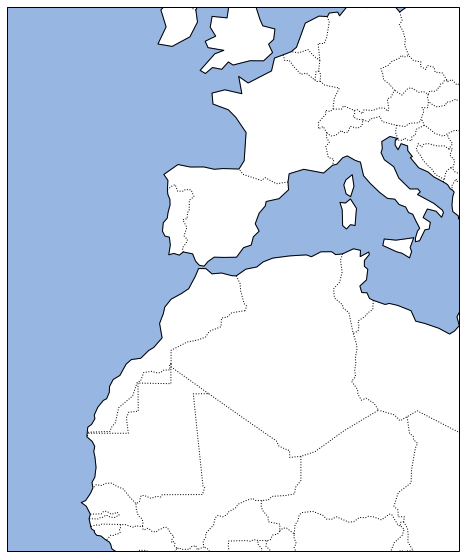

In [27]:
# define mercator as projection
proj= ccrs.Mercator()

plt.figure(figsize = (10,10))

ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))

ax.add_feature(cfeature.BORDERS, linestyle =':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.LAND)
# one line of code

In [28]:
for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y,'.',transform = ccrs.Geodetic(), label = name)
    
#  ------------- errorr ------------   
plt.ax.legend(loc = 'best')
plt.ax.savefig('map.pdf')
plt.ax.show()   

# ----------------------------------

# plt.figure(figsize = (8,8))
# for name in bird_names:
#     ix = birddata['bird_name'] == name # bool data. Iterate eric, nico, sanne. 
#     x, y = birddata.longitude[ix], birddata.latitude[ix] # store data only true
#     plt.plot(x,y,'.',label = name)
#     plt.xlabel('Longitude')
#     plt.ylabel('Latitude')
# plt.legend(loc = 'best')
# plt.savefig('birds_trajectories.pdf')

AttributeError: module 'matplotlib.pyplot' has no attribute 'ax'

#### Task 06: Dealing with timestamps and operations with timestamps

- import *datetime* -  a python library that is is made for dealing with these types of data.
- to operate on the time and date stamps, such as finding out how much time has elapsed between any two timestamps, we first need to convert them into so-called *daytime object*, that
supports our arithmetic operations.
- to become more familiar with the datetimelibrary, we call the function *today* from the module 'datetime'. It returns to us a datetime, datetime object, that consists of the current date and timestamp.
- get the time elapsed between t1 and t2 by applying the arithmetic operation. The output is what's called a *time delta* object .


- our dataframe contains a column 'date_time'. Look at a couple of entries in this column and check their type
- assignt to a variable **date_string** the first entry in the 'date_time' column

- convert the time observation (timestamps) **date_string** given as strings in **datetime object**
 


In [ ]:
# one line of code
import datetime

In [ ]:
t1 = datetime.datetime.today()
t1

In [ ]:
t2 = datetime.datetime.today()
t2

In [ ]:
# one line of code
time_diff = t2 - t1
time_diff

In [ ]:
# our dataframe contains a column 'date_time'. Look at a couple of entries in this column and check their type
# one line of code
birddata.loc[0:10, 'date_time']
type(birddata.loc[0:10, 'date_time'])

In [ ]:
# assignt to a variable date_string the first entry in the 'date_time' column
date_string= birddata.loc[0,'date_time']
type(date_string)
date_string

In [ ]:
# the field following second is UTC is an offset that is expressed in hours
#and here is always 0, that 's why we can ignore it
date_string[:-3]

To compute how much time has passed between any two observations in our data set, we first have to **convert the timestamps, now given as strings, to datetime objects**.

Next we're going to use **strip time function** to turn a string to a datetime object.

- the first argument is the string, which we would like to turn into a datetime object.
- the second argument is also a string, but in this case the latter string **specifies the *formatting* to be applied to the first string.**


In [ ]:
# convert the time observation (timestamps) date_string given as strings in datetime object

datetime.datetime.strptime(date_string[:-3], "%Y-%m-%d %H:%M:%S")

You can now use this function to go over each row in our data set, and create a new datetime object corresponding to every single row. You can follow the following steps:
- set up an empty list, called e.g. timestamps
- loop over every single row in birds data set
> - for every single row, extract the date time, ignoring the last three characters.
> - append the resulting object to the timestamps list.


In [ ]:
timestamps =[]
for k in range(len(birddata)):
    # append to the timestamp list the converted time object (practically apply to each row the cell code provided in the previous code cell) 
    # you have only to meaningfully combine the code in the previous three cells, for the looping var k
    
    # extract date time 
    foo = birddata.loc[k,'date_time']
    
    # cut off the last three elements of date time
    hoge = datetime.datetime.strptime(foo[:-3], "%Y-%m-%d %H:%M:%S")
    
    # add to timestamps list
    timestamps.append(hoge)

timestamps
    

In [ ]:
# checking the first 5 timestamps
timestamps[:5]

- construct a panda series object and insert the timestamp from my Python list into that object (left side)
- append the panda series as a new column in my bird data data frame (right side)

Hint: pd.Series(data, index = ), use the index from birddata dataframe

In [ ]:
# birddata['timestamp'] = pd.Series(timestamps)
birddata['timestamp'] = pd.Series(timestamps )
birddata

In [ ]:
# check the new dataframe
birddata.head(2)

In [ ]:
# doing arithmetic with timestamps
birddata.timestamp[4]-birddata.timestamp[3]

Create a list that captures the amount of time that has elapsed since the beginning of data collection:
- first, extract the timestamps for Eric, in an object called 'times'
- create the elapsed time object as a list comprehension.



In [ ]:
times = birddata.timestamp[birddata.bird_name== 'Eric']
elapsed_time = [None] # the list will contain the results of the different timestamps - the initial timestamp
for k in range(len(times)):
    foo = times[k] - times[0]
    elapsed_time.append(foo)

elapsed_time

In [ ]:
elapsed_time[0]

In [ ]:
elapsed_time[1000]


##### Compute the number of elapsed days 
- to measure time in certain units, like hours or days take a given time object and divide by a time delta object.
> - create a time delta object that's equal to 1 day
> - do the division


In [ ]:
day_unit =datetime.timedelta(days= 1)
type(day_unit)
type(elapsed_time[1])

In [ ]:
days = elapsed_time[1000]/day_unit

In [ ]:
type(days)

In [ ]:
# compute the number of elapsed days for the whole dataset; convert elapsed time to a np.array() to be able to make the division

all_bird_times = birddata['timestamp']
elapsed_time = [None] # the list will contain the results of the different timestamps - the initial timestamp
elapsed_days = [None]
for k in range(len(all_bird_times)):
    foo = all_bird_times[k] - all_bird_times[0]
    elapsed_time.append(foo) # list with time
    print(elapsed_time[k])
#     hoge = elapsed_time[k] /day_unit
#     elapsed_a = np.array(elapsed_time) # convert list into array
#     days = foo2[k]/day_unit
#     days = elapsed_time[k] / day_unit


# elapsed_days
# elapsed_time

##### Ploting the number of observation versus elapsed days

- to plot th enumber of day elapsed, we have to convert elapsed to a np.array()

In [ ]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days= 1))
plt.xlabel("Observations")
plt.ylabel('Elapsed_Time')


What can be the meaning of the inflections of the line in the neighborhood of the 6000th observation? 


##### Calculating and plot daily mean speed



In [ ]:
next_day= 1
daily_mean_speed = []
inds = []
for (i, t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        #compute the dayly mean speed
        daily_mean_speed.append(np.mean(birddata.speed_2d[inds]))
        next_day +=1
        #reset inds
        inds = []


In [ ]:
daily_mean_speed

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel('Day')
plt.ylabel('Daily mean speed m/s')
plt.show()

What could indicate the two spikes visible on the plot?

### Looking for patterns of flight 

pandas makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe.

#### Task 08: 
1. Group the dataframe by birdname and then find the average speed_2d for each bird.

> - First, use `groupby()` to group the data by "bird_name".


> - Calculate the mean of `speed_2d` using the `mean()` function on subbsetting the groupby object on the column 'speed_2d' 


2. Find the mean `altitude` for each bird in a similar way


In [ ]:
hoge = birddata.groupby('bird_name')
# birddata
